In [12]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import load_house_data, run_gradient_descent
from lab_utils_multi import norm_plot, plt_equal_scale, plot_cost_i_w
from lab_utils_common import dlc

np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [13]:
# So much nicer
X_train, y_train = load_house_data()
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']

### The dataset, visualized

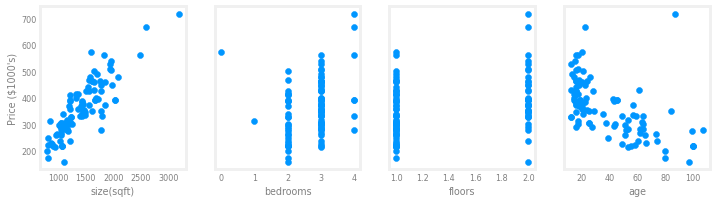

In [14]:
fix, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train)
    ax[i].set_xlabel(X_features[i])
    ax[i].xaxis.label.set_color('gray')
    ax[i].tick_params(axis='x', colors='gray')
ax[0].set_ylabel('Price ($1000\'s)')
ax[0].yaxis.label.set_color('gray')
ax[0].tick_params(axis='y', colors='gray')
plt.show()

Visually, we can see that size seems to have the greatest correlation with price increase, and age seems to have somewhat of an anti-correlative effect.
However, it seems that the number of bedrooms and floors don't contribute that strongly (though there might be a slight correlation)

## Learning Rate Modification

In [15]:
# Using the utility version, though out of interest, may want to try my own
_, _, hist = run_gradient_descent(X_train, y_train, 10)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 9.91571e+04  5.5e-01  1.0e-03  5.2e-04  1.2e-02  3.6e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 1.38010e+05 -1.0e-01 -2.0e-04 -1.1e-04 -3.7e-03 -5.7e-05  6.5e+05  1.2e+03  6.3e+02  1.6e+04  4.2e+02
        2 1.92333e+05  6.7e-01  1.2e-03  6.2e-04  1.4e-02  4.5e-04 -7.7e+05 -1.4e+03 -7.3e+02 -1.8e+04 -5.1e+02
        3 2.68286e+05 -2.4e-01 -4.7e-04 -2.6e-04 -8.4e-03 -1.4e-04  9.1e+05  1.7e+03  8.8e+02  2.2e+04  5.9e+02
        4 3.74483e+05  8.4e-01  1.5e-03  7.6e-04  1.6e-02  5.7e-04 -1.1e+06 -2.0e+03 -1.0e+03 -2.5e+04 -7.1e+02
        5 5.22966e+05 -4.4e-01 -8.4e-04 -4.7e-04 -1.4e-02 -2.6e-04  1.3e+06  2.3e+03  1.2e+03  3.1e+04  8.3e+02
        6 7.30570e+05  1.1e+00  1.9e-03  9.6e-04  2.1e-02  7.3e-04 -1.5e+06 -2.8e+03 -1.4e+03 -3.5e+04 -

The default $\alpha$ is $1e-6$, and that appears to be too high. Note the increasing cost.
Plot it to see:

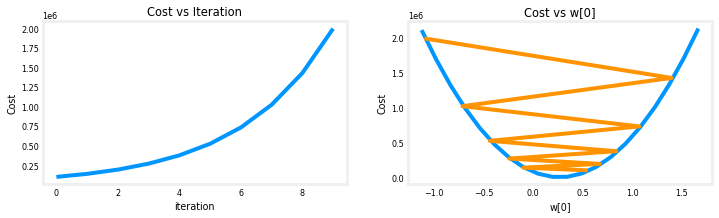

In [16]:
plot_cost_i_w(X_train, y_train, hist)

Oof.

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.64616e+04  5.0e-01  9.1e-04  4.7e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 6.18990e+04  1.8e-02  2.1e-05  2.0e-06 -7.9e-04  1.9e-05  5.3e+05  9.8e+02  5.2e+02  1.3e+04  3.4e+02
        2 5.76572e+04  4.8e-01  8.6e-04  4.4e-04  9.5e-03  3.2e-04 -5.1e+05 -9.3e+02 -4.8e+02 -1.1e+04 -3.4e+02
        3 5.37137e+04  3.4e-02  3.9e-05  2.8e-06 -1.6e-03  3.8e-05  4.9e+05  9.1e+02  4.8e+02  1.2e+04  3.2e+02
        4 5.00474e+04  4.6e-01  8.2e-04  4.1e-04  8.0e-03  3.2e-04 -4.8e+05 -8.7e+02 -4.5e+02 -1.1e+04 -3.1e+02
        5 4.66388e+04  5.0e-02  5.6e-05  2.5e-06 -2.4e-03  5.6e-05  4.6e+05  8.5e+02  4.5e+02  1.2e+04  2.9e+02
        6 4.34700e+04  4.5e-01  7.8e-04  3.8e-04  6.4e-03  3.2e-04 -4.4e+05 -8.1e+02 -4.2e+02 -9.8e+03 -

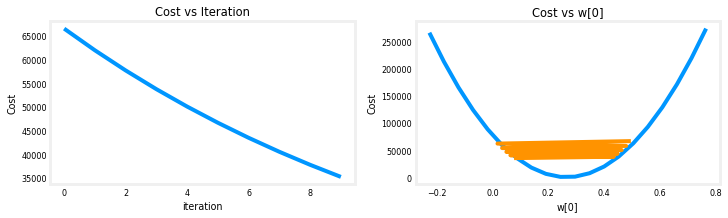

In [17]:
alpha = 9e-7 # sliiiiiightly smaller
_, _, hist = run_gradient_descent(X_train, y_train, 10, alpha)
plot_cost_i_w(X_train, y_train, hist)

It's slow, but it's decreasing!
Look at the way it steps across the bottom of the bowl - I think we'd benefit from an even smaller $\alpha$

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.42313e+04  5.5e-02  1.0e-04  5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 2.76461e+04  9.8e-02  1.8e-04  9.2e-05  2.2e-03  6.5e-05 -4.3e+05 -7.9e+02 -4.0e+02 -9.5e+03 -2.8e+02
        2 1.75102e+04  1.3e-01  2.4e-04  1.2e-04  2.9e-03  8.7e-05 -3.4e+05 -6.1e+02 -3.1e+02 -7.3e+03 -2.2e+02
        3 1.13157e+04  1.6e-01  2.9e-04  1.5e-04  3.5e-03  1.0e-04 -2.6e+05 -4.8e+02 -2.4e+02 -5.6e+03 -1.8e+02
        4 7.53002e+03  1.8e-01  3.3e-04  1.7e-04  3.9e-03  1.2e-04 -2.1e+05 -3.7e+02 -1.9e+02 -4.2e+03 -1.4e+02
        5 5.21639e+03  2.0e-01  3.5e-04  1.8e-04  4.2e-03  1.3e-04 -1.6e+05 -2.9e+02 -1.5e+02 -3.1e+03 -1.1e+02
        6 3.80242e+03  2.1e-01  3.8e-04  1.9e-04  4.5e-03  1.4e-04 -1.3e+05 -2.2e+02 -1.1e+02 -2.3e+03 -

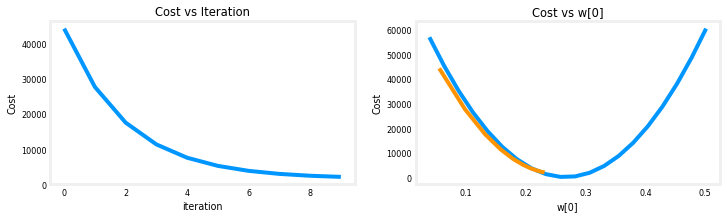

In [18]:
alpha = 1e-7
_, _, hist = run_gradient_descent(X_train, y_train, 10, alpha)
plot_cost_i_w(X_train, y_train, hist)

## Feature Scaling

The only interesting one is z-score normalization, so:

In [19]:
def zscore_normalize_features(X):
    mu = np.mean(X, axis=0) # X.shape = (m, n) => mu.shape = (n,)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

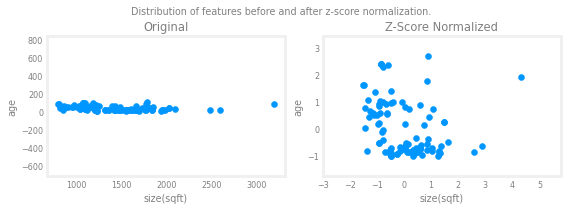

In [21]:
# Plot it out
X_norm, mu, sigma = zscore_normalize_features(X_train)

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0], color="gray")
ax[0].set_ylabel(X_features[3], color="gray")
ax[0].set_title("Original", color="gray")
ax[0].axis('equal')

ax[1].scatter(X_norm[:, 0], X_norm[:, 3])
ax[1].set_xlabel(X_features[0], color="gray")
ax[1].set_ylabel(X_features[3], color="gray")
ax[1].set_title("Z-Score Normalized", color="gray")
ax[1].axis('equal')

ax[0].tick_params(colors='gray')
ax[1].tick_params(colors='gray')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("Distribution of features before and after z-score normalization.", color="gray")

plt.show()

The original data shows the massive difference in scale between these two features (that we saw visually are the most important ones).
Normalizing the values gives us the features centered at zero with similar scales, making it easier to look at, but also to deal with mathematically.

Normalize the entirety of the data next.

In [22]:
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)

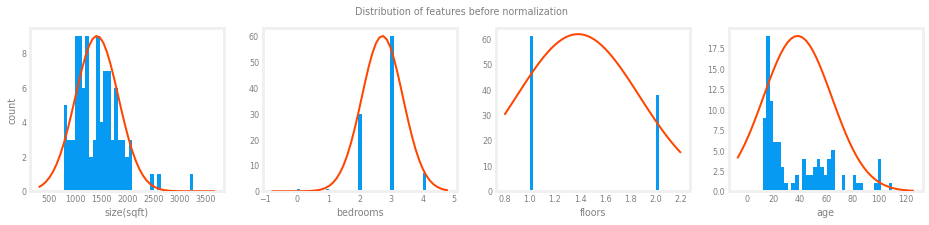

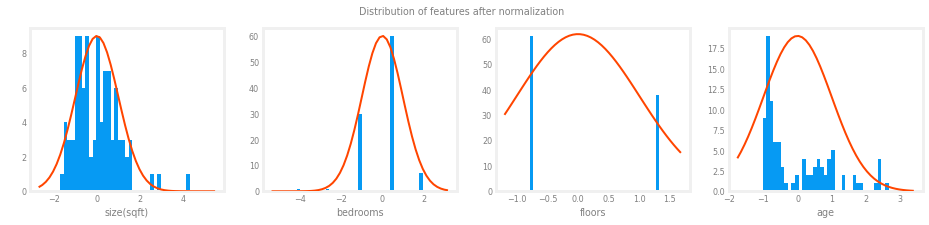

In [26]:
# And now the plotting
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
for i in range(len(ax)):
    norm_plot(ax[i], X_train[:, i], )
    ax[i].set_xlabel(X_features[i], color="gray")
    ax[i].tick_params(colors="gray")
ax[0].set_ylabel("count", color="gray")
fig.suptitle("Distribution of features before normalization", color="gray")
plt.show()

fig, ax = plt.subplots(1, 4, figsize=(16, 3))
for i in range(len(ax)):
    norm_plot(ax[i], X_norm[:, i], )
    ax[i].set_xlabel(X_features[i], color="gray")
    ax[i].tick_params(colors="gray")
ax[0].set_ylabel("count", color="white")
fig.suptitle("Distribution of features after normalization", color="gray")
plt.show()

Data spread looks the same, but the actual ranges are much more in line with each other, yay.
And, with this normalized data, $\large \alpha$ doesn't necessarily need to be so horrendously small:

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.76170e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.21086e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.2e-01  4.5e-01  5.3e-01 -1.7e-01 -9.6e-03
      200 2.19209e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.0e-02  1.5e-02  1.7e-02 -6.0e-03 -2.6e-07
      300 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.0e-03  5.1e-04  5.7e-04 -2.0e-04 -6.9e-12
      400 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.4e-05  1.7e-05  1.9e-05 -6.6e-06 -2.7e-13
      500 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.1e-06  5.6e-07  6.2e-07 -2.2e-07 -2.6e-13
      600 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.7e-08  1.9e-08  2.1e-08 -7.3e-09 -

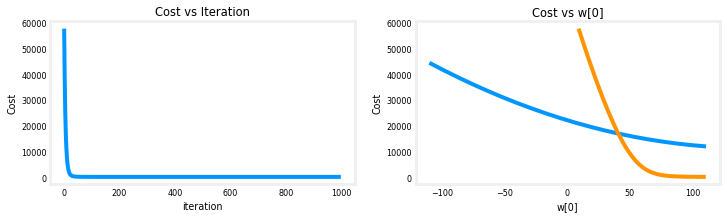

In [40]:
w_norm, b_norm, norm_hist = run_gradient_descent(X_norm, y_train, 1000, 1e-1)
plot_cost_i_w(X_norm, y_train, norm_hist)

Dramatic.
Now to predict and plot those predictions versus true values.

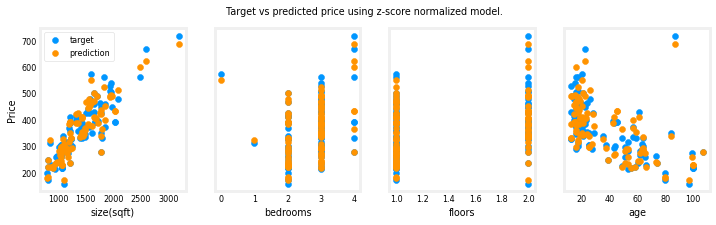

In [42]:
m = X_norm.shape[0]
yp = np.zeros(m)
# V This can be vectorized but lazy - see prior lab
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train, label='target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i], yp, color=dlc["dlorange"], label="prediction")

ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("Target vs predicted price using z-score normalized model.")

plt.show()

## Novel Predictions

Now to predict the price of a house not in our training set.
__Remember__ to normalize the data with the \mu and \sigma from the training set!

In [45]:
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - X_mu) / X_sigma
print(x_house_norm)

x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(f"Predicted price for a 40-year-old, 1200 sqft house with 3 bedrooms and 1 floor: \n${x_house_predict * 1000: 0.0f}")

[-0.53  0.43 -0.79  0.06]
Predicted price for a 40-year-old, 1200 sqft house with 3 bedrooms and 1 floor: 
$ 318709
